In [21]:
# load dataset 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_ppo_reward = pd.read_csv('../hpo_ppo_reward.csv')
df_ppo_target = pd.read_csv('../hpo_ppo_target_seed.csv')
df_dqn_target = pd.read_csv('../hpo_dqn_target.csv')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24992\1194659635.py:24: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=df_all, x='target_label', y='final_reward', hue='algorithm', dodge=True,


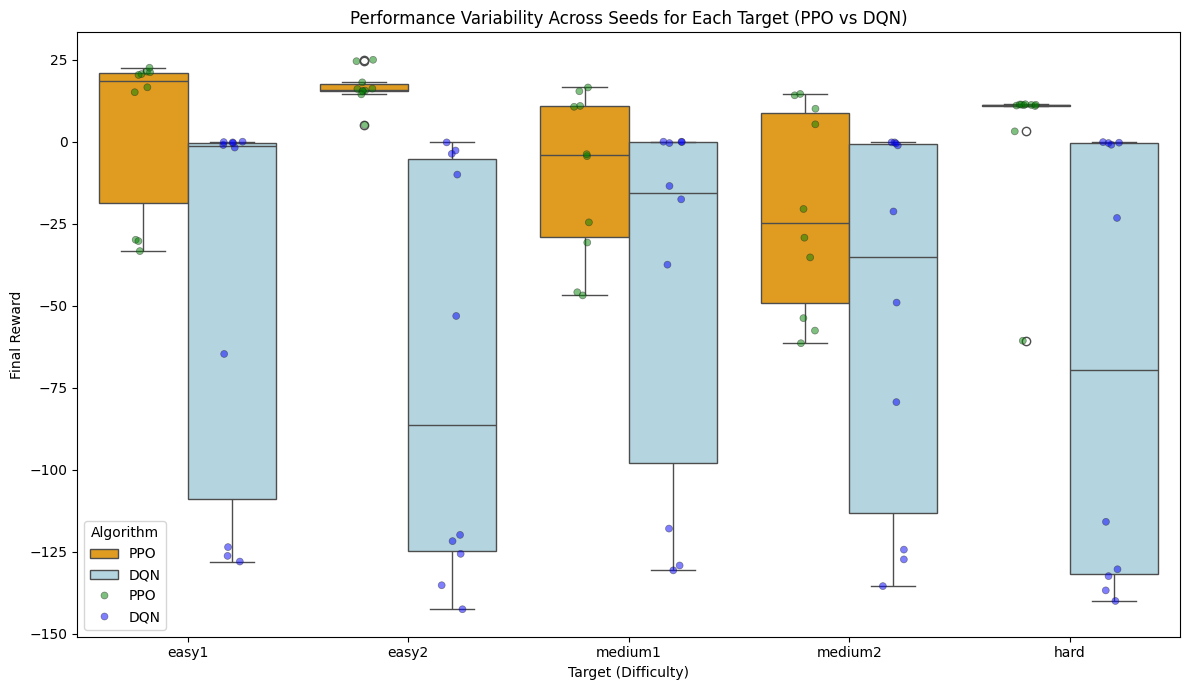

In [22]:
# Calculate distance from fixed point (1.5, 22.5)
for df in [df_ppo_target, df_dqn_target]:
    df['distance'] = np.sqrt((df['target_x'] - 1.5)**2 + (df['target_y'] - 22.5)**2)

# Define target difficulty labels by sorted distance
unique_targets = df_ppo_target[['target_x', 'target_y', 'distance']].drop_duplicates().sort_values('distance').reset_index(drop=True)
labels = ['easy1', 'easy2', 'medium1', 'medium2', 'hard']
unique_targets['target_label'] = labels[:len(unique_targets)]

# Merge target labels back to both datasets
df_ppo_target = df_ppo_target.merge(unique_targets[['target_x', 'target_y', 'target_label']], on=['target_x', 'target_y'], how='left')
df_dqn_target = df_dqn_target.merge(unique_targets[['target_x', 'target_y', 'target_label']], on=['target_x', 'target_y'], how='left')

# Add algorithm label for legend
df_ppo_target['algorithm'] = 'PPO'
df_dqn_target['algorithm'] = 'DQN'

# Combine PPO and DQN data for plotting
df_all = pd.concat([df_ppo_target, df_dqn_target], ignore_index=True)

# Plot boxplot and scatterplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_all, x='target_label', y='final_reward', hue='algorithm', order=labels, palette=['orange', 'lightblue'])
sns.stripplot(data=df_all, x='target_label', y='final_reward', hue='algorithm', dodge=True,
              order=labels, palette=['green', 'blue'], alpha=0.5, jitter=True, marker='o', edgecolor='gray', linewidth=0.5)
plt.title('Performance Variability Across Seeds for Each Target (PPO vs DQN)')
plt.xlabel('Target (Difficulty)')
plt.ylabel('Final Reward')
plt.legend(title='Algorithm', loc='lower left')
plt.tight_layout()
plt.show()

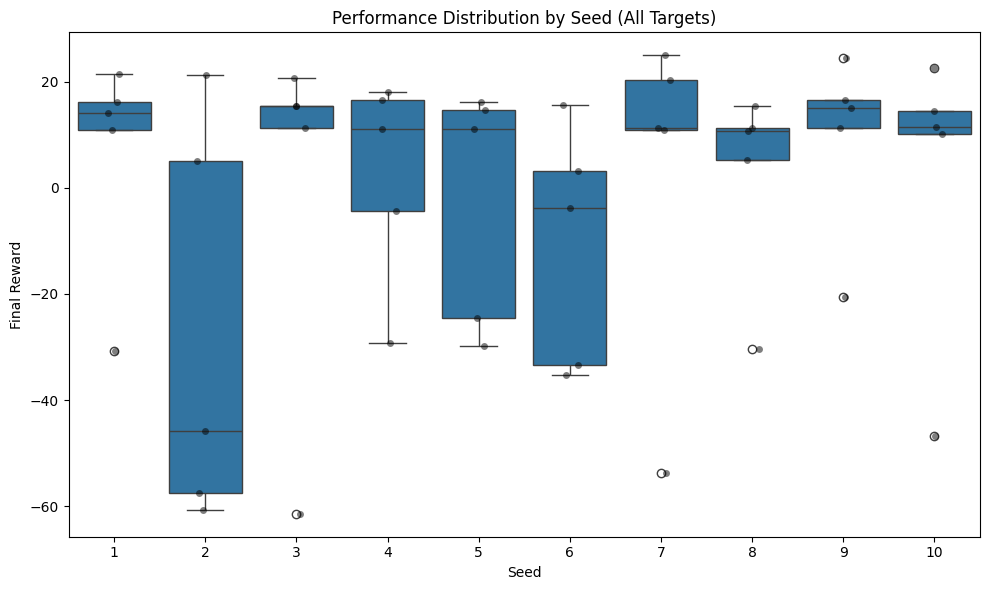

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ppo_target, x='seed', y='final_reward')
sns.stripplot(data=df_ppo_target, x='seed', y='final_reward', color='black', alpha=0.5, jitter=True)
plt.title('Performance Distribution by Seed (All Targets)')
plt.xlabel('Seed')
plt.ylabel('Final Reward')
plt.tight_layout()
plt.show()

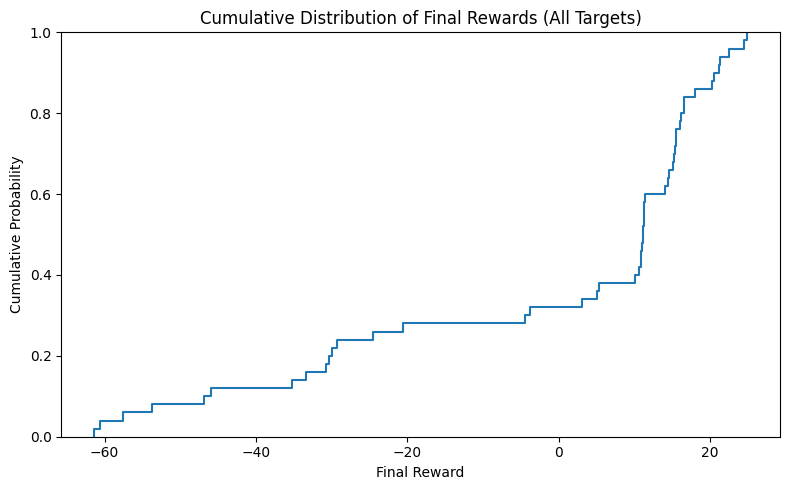

In [ ]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df_ppo_target, x='final_reward')
plt.title('Cumulative Distribution of Final Rewards (All Targets)')
plt.xlabel('Final Reward')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

/tmp/ipykernel_29119/2100039931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_var, x='target_label', y='final_reward', palette=target_palette, order=labels)


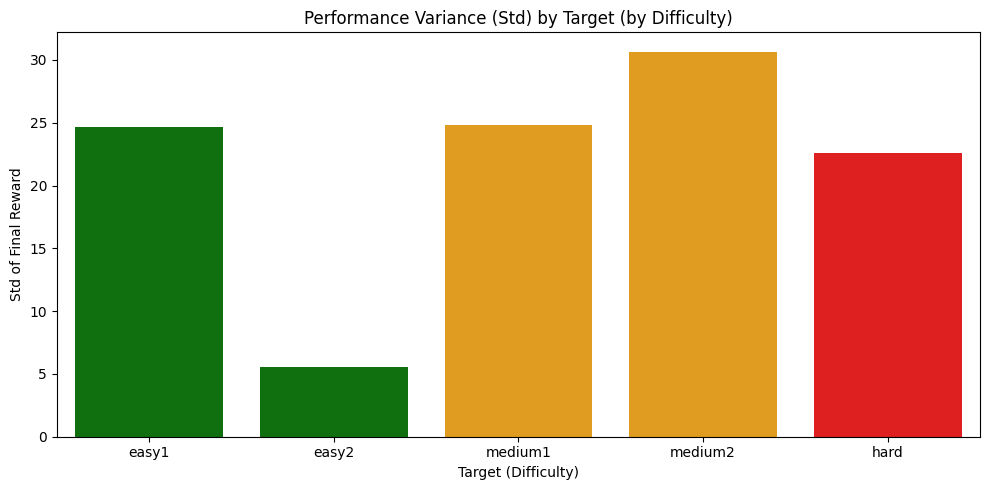

In [ ]:
if 'target_label' in df_ppo_target.columns:
    target_var = df_ppo_target.groupby('target_label')['final_reward'].std().reindex(labels).reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=target_var, x='target_label', y='final_reward', palette=target_palette, order=labels)
    plt.title('Performance Variance (Std) by Target (by Difficulty)')
    plt.xlabel('Target (Difficulty)')
    plt.ylabel('Std of Final Reward')
    plt.tight_layout()
    plt.show()

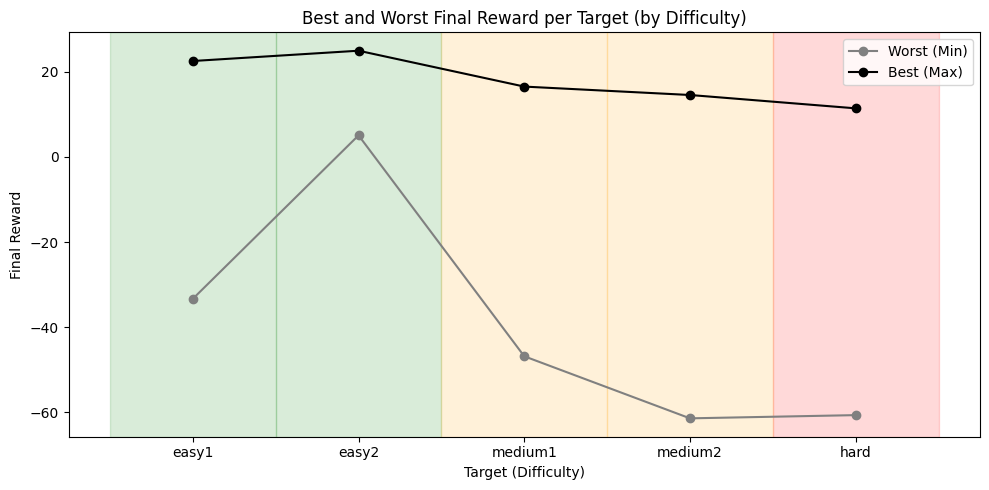

In [ ]:
if 'target_label' in df_ppo_target.columns:
    target_stats = df_ppo_target.groupby('target_label')['final_reward'].agg(['min', 'max']).reindex(labels).reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(target_stats['target_label'], target_stats['min'], marker='o', label='Worst (Min)', color='gray')
    plt.plot(target_stats['target_label'], target_stats['max'], marker='o', label='Best (Max)', color='black')
    for i, label in enumerate(labels):
        plt.gca().axvspan(i-0.5, i+0.5, color=target_palette[label], alpha=0.15)
    plt.title('Best and Worst Final Reward per Target (by Difficulty)')
    plt.xlabel('Target (Difficulty)')
    plt.ylabel('Final Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()